In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set(style='darkgrid')

In [2]:
df= pd.read_csv('sales2015.csv')

In [15]:
df['Sale Date']=pd.to_datetime(df['Sale Date'], errors = 'coerce')
df['Month'] = df['Sale Date'].dt.month
df.tail()

,Unnamed: 0,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Sale Price,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,Month
16912,16912,093 13 0C 110.00,RESIDENTIAL CONDO,600 12TH AVE S,620.0,NASHVILLE,2015-12-04,450000,20151208-0123501,No,No,12
16913,16913,093 13 0C 230.00,RESIDENTIAL CONDO,600 12TH AVE S,1012.0,NASHVILLE,2015-12-04,285000,20151210-0124446,No,No,12
16914,16914,093 13 0C 300.00,RESIDENTIAL CONDO,600 12TH AVE S,1514.0,NASHVILLE,2015-12-29,350000,20151230-0131160,No,No,12
16915,16915,093 13 0C 309.00,RESIDENTIAL CONDO,600 12TH AVE S,1606.0,NASHVILLE,2015-12-17,419000,20151222-0128556,No,No,12
16916,16916,093 13 0C 349.00,RESIDENTIAL CONDO,600 12TH AVE S,1812.0,NASHVILLE,2015-12-07,280000,20151209-0123792,No,No,12


In [11]:
df['Property City'].unique()

array(['NASHVILLE', 'ANTIOCH', 'BRENTWOOD', 'NOLENSVILLE', 'WHITES CREEK',
       'GOODLETTSVILLE', 'MADISON', 'OLD HICKORY', 'HERMITAGE',
       'MOUNT JULIET', nan, 'JOELTON'], dtype=object)

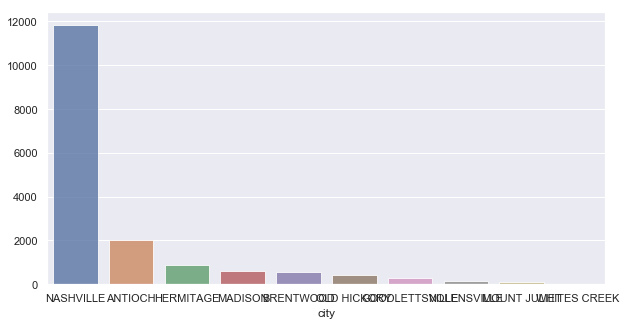

NASHVILLE         11807
ANTIOCH            2029
HERMITAGE           884
MADISON             582
BRENTWOOD           547
OLD HICKORY         430
GOODLETTSVILLE      275
NOLENSVILLE         154
MOUNT JULIET         90
WHITES CREEK         27
JOELTON               3
Name: Property City, dtype: int64


In [6]:
city_count  = df['Property City'].value_counts()
city_count = city_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(city_count.index, city_count.values, alpha=0.8)
#plt.title('Starbucks in top 10 cities in the World')
#plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('city', fontsize=12)
plt.show()
print(df['Property City'].value_counts())

#Note: I want to compare how development is distributed across cities for each year.

SINGLE FAMILY                                 10021
RESIDENTIAL CONDO                              4363
VACANT RESIDENTIAL LAND                        1703
DUPLEX                                          401
ZERO LOT LINE                                   302
RESIDENTIAL COMBO/MISC                           27
CONDOMINIUM OFC  OR OTHER COM CONDO              22
TRIPLEX                                          17
QUADPLEX                                         15
MOBILE HOME                                       7
CHURCH                                            6
SPLIT CLASS                                       5
VACANT RESIENTIAL LAND                            3
DORMITORY/BOARDING HOUSE                          3
FOREST                                            3
GREENBELT                                         3
PARSONAGE                                         3
PARKING LOT                                       2
VACANT COMMERCIAL LAND                            2
TERMINAL/DIS

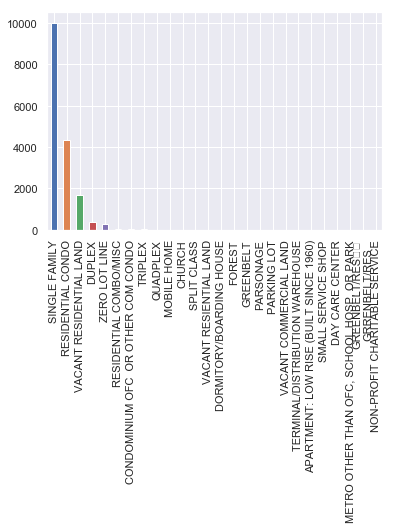

In [7]:
df['Land Use'].value_counts().plot.bar()
print(df['Land Use'].value_counts())

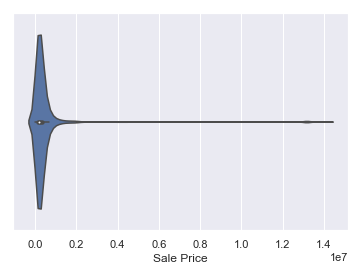

In [27]:
sns.violinplot(df['Sale Price'])

In [27]:
#sns.lineplot(x='Month',y=df[df['Land Use']=='RESIDENTIAL CONDO'],data=df)
byDate=df.set_index('Sale Date')
y = byDate['Sale Price'].resample('M').mean()
x= byDate['Sale Price'].resample('M').count()

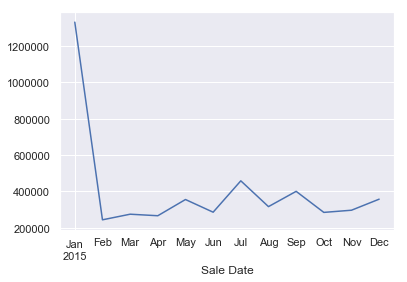

In [29]:
y.plot()

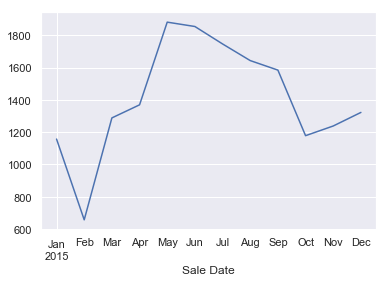

In [31]:
x.plot()

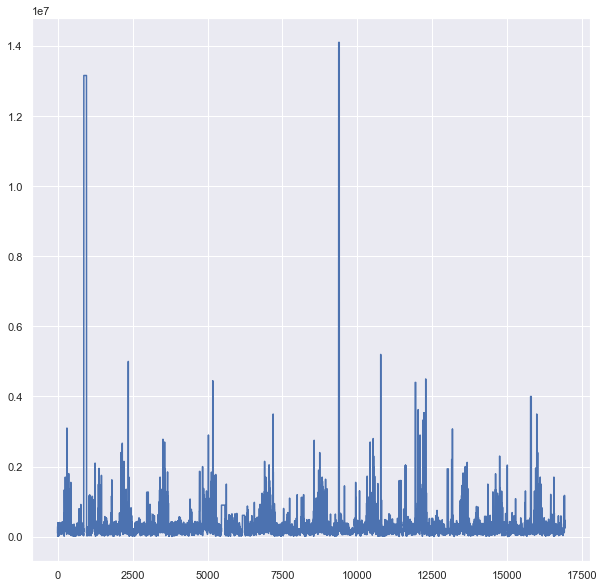

In [39]:
from pandas import Series
plt.figure(figsize=(10,10))
Series(df['Sale Price']).plot()

### Links for reference:

https://machinelearningmastery.com/time-series-data-visualization-with-python/

https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/

https://stackoverflow.com/questions/26507404/time-series-boxplot-in-pandas